<a href="https://colab.research.google.com/github/akashbhakat-bit/AMO1/blob/main/Part%201%20R_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("tidyverse")
install.packages("ggthemes")
install.packages("lubridate")
install.packages("skimr")
install.packages("janitor")
install.packages("httr")
install.packages("readxl")
install.packages("vroom")
install.packages("countrycode")
install.packages("patchwork")
install.packages("gganimate")
install.packages("tictoc")
install.packages("DBI")
install.packages("dbplyr")
install.packages("arrow")
install.packages("rvest")
install.packages("scales")
install.packages("readxl")
install.packages("plotly")
install.packages("mosaic")
install.packages("infer")
install.packages("here")
install.packages("wbstats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘tweenr’




In [4]:
# importing libraries

library(tidyverse)
library(mosaic)
library(ggthemes)
library(lubridate)
library(here)
library(skimr)
library(janitor)
library(httr)
library(readxl)
library(vroom)
library(wbstats)
library(countrycode)
library(patchwork)
library(gganimate)
library(tictoc)
library(DBI)
library(dbplyr)
library(arrow)
library(rvest)
library(scales)
library(readxl)
library(plotly)
library(infer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'mosaic':
  method                           from   
  fortify.SpatialPolygonsDataFrame ggplot2


The 'mosaic' package masks several functions from core packages in order to add 
additional features.  The original behavior of these functions should not be affected by this.


Attaching package: ‘mosaic’


The following object is masked from ‘package:Matrix’:

    mean


The following objects are masked from ‘package:dplyr’:

    count, d

Q2-HW3

# IMDB ratings: Differences between directors

Recall the IMBD ratings data.
I would like you to explore whether the mean IMDB rating for Steven Spielberg
and Tim Burton are the same or not. I have already calculated the confidence intervals
for the mean ratings of these two directors and as you can see they overlap.


```{r directors, echo=FALSE, out.width="100%"}
knitr::include_graphics(here::here("images", "directors.png"), error = FALSE)
```

First, I would like you to reproduce this graph. You may find `geom_errorbar()` and `geom_rect()` useful.

In addition, you will run a hpothesis test. You should use both the `t.test` command and the `infer` package to simulate from a null distribution, where you assume zero difference between the two.

> Before anything, write down the null and alternative hypotheses, as well as the resulting test statistic and the associated t-stat or p-value. At the end of the day, what do you conclude?

In [6]:
# loading movies.csv

movies <- read_csv("/content/movies.csv")                                       # loading dataframe
glimpse(movies)                                                                 # summary of the dataframe movies & its structure


Rows: 2961 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): title, genre, director
dbl (8): year, duration, gross, budget, cast_facebook_likes, votes, reviews,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,961
Columns: 11
$ title               <chr> "Avatar", "Titanic", "Jurassic World", "The Avenge…
$ genre               <chr> "Action", "Drama", "Action", "Action", "Action", "…
$ director            <chr> "James Cameron", "James Cameron", "Colin Trevorrow…
$ year                <dbl> 2009, 1997, 2015, 2012, 2008, 1999, 1977, 2015, 20…
$ duration            <dbl> 178, 194, 124, 173, 152, 136, 125, 141, 164, 93, 1…
$ gross               <dbl> 760505847, 658672302, 652177271, 623279547, 533316…
$ budget              <dbl> 2.37e+08, 2.00e+08, 1.50e+08, 2.20e+08, 1.85e+08, …
$ cast_facebook_likes <dbl> 4834, 45223, 8458, 87697, 57802, 37723, 13485, 920…
$ votes               <dbl> 886204, 793059, 418214, 995415, 1676169, 534658, 9…
$ reviews             <dbl> 3777, 2843, 1934, 2425, 5312, 3917, 1752, 1752, 35…
$ rating              <dbl> 7.9, 7.7, 7.0, 8.1, 9.0, 6.5, 8.7, 7.5, 8.5, 7.2, …


Hypothesis

H0 : mean IMDB rating for Steven Spielberg and Tim Burton are the same

H1 : mean IMDB rating for Steven Spielberg and Tim Burton are not the same

t-test

In [7]:
refined_dataframe <- movies %>%
  group_by(director) %>%
  filter(director %in% c("Steven Spielberg", "Tim Burton")) %>%
  select(director,rating)

#head(refined_dataframe)

steven_rating <- (refined_dataframe %>% filter(director=="Steven Spielberg"))$rating
tim_rating <- (refined_dataframe %>% filter(director=="Tim Burton"))$rating

# Perform independent samples t-test
t_test_result <- t.test(rating ~ director, data = refined_dataframe)
t_test_result

# Get the observed t-statistic
observed_t_statistic <- t_test_result$statistic

# set seed
set.seed(1234)
# Create a null model by shuffling 'director' labels while preserving sample sizes
null_model <- refined_dataframe %>%
  specify(formula = rating ~ director) %>%
  hypothesize(null = "independence") %>%
  generate(reps = 1000, type = "permute") %>%
  calculate(stat = "t", order = c("Steven Spielberg", "Tim Burton"))

# Calculate the p-value based on the null distribution
p_value_simulated <- null_model %>%
  get_p_value(obs_stat = observed_t_statistic, direction = "both")

# Print the simulated p-value
p_value_simulated


	Welch Two Sample t-test

data:  rating by director
t = 2.7144, df = 30.812, p-value = 0.01078
alternative hypothesis: true difference in means between group Steven Spielberg and group Tim Burton is not equal to 0
95 percent confidence interval:
 0.1596624 1.1256637
sample estimates:
mean in group Steven Spielberg       mean in group Tim Burton 
                      7.573913                       6.931250 


p_value
<dbl>
0.008


# Exploring sources of electricity production, CO2 emissions, and GDP per capita.

## 1. A stacked area chart that shows how your own country generated its electricity since 2000.

You will use

`geom_area(colour="grey90", alpha = 0.5, position = "fill")`

## 2. A scatter plot that looks at how CO2 per capita and GDP per capita are related

## 3. A scatter plot that looks at how electricity usage (kWh) per capita/day GDP per capita are related

Specific questions:

1.  How would you turn `energy` to long, tidy format?
2.  You may need to join these data frames
    -   Use `left_join` from `dplyr` to [join the tables](http://r4ds.had.co.nz/relational-data.html)
    -   To complete the merge, you need a unique *key* to match observations between the data frames. Country names may not be consistent among the three dataframes, so please use the 3-digit ISO code for each country
    -   An aside: There is a great package called [`countrycode`](https://github.com/vincentarelbundock/countrycode) that helps solve the problem of inconsistent country names (Is it UK? United Kingdom? Great Britain?). `countrycode()` takes as an input a country's name in a specific format and outputs it using whatever format you specify.
3.  Write a function that takes as input any country's name and returns all three graphs. You can use the `patchwork` package to arrange the three graphs as shown below


In [8]:
# Download electricity data
url <- "https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv"

energy <- read_csv(url) %>%
  filter(year >= 1990) %>%
  drop_na(iso_code) %>%
  select(1:3,
         biofuel = biofuel_electricity,
         coal = coal_electricity,
         gas = gas_electricity,
         hydro = hydro_electricity,
         nuclear = nuclear_electricity,
         oil = oil_electricity,
         other_renewable = other_renewable_exc_biofuel_electricity,
         solar = solar_electricity,
         wind = wind_electricity,
         electricity_demand,
         electricity_generation,
         net_elec_imports,    # Net electricity imports, measured in terawatt-hours
         energy_per_capita,    # Primary energy consumption per capita, measured in kilowatt-hours    Calculated by Our World in Data based on BP Statistical Review of World Energy and EIA International Energy Data
         energy_per_gdp,    # Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$.
         per_capita_electricity, #    Electricity generation per capita, measured in kilowatt-hours
  )

# Download data for C02 emissions per capita https://data.worldbank.org/indicator/EN.ATM.CO2E.PC
co2_percap <- wb_data(country = "countries_only",
                      indicator = "EN.ATM.CO2E.PC",
                      start_date = 1990,
                      end_date = 2022,
                      return_wide=FALSE) %>%
  filter(!is.na(value)) %>%
  #drop unwanted variables
  select(-c(unit, obs_status, footnote, last_updated)) %>%
  rename(year = date,
         co2percap = value)


# Download data for GDP per capita  https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.KD
gdp_percap <- wb_data(country = "countries_only",
                      indicator = "NY.GDP.PCAP.PP.KD",
                      start_date = 1990,
                      end_date = 2022,
                      return_wide=FALSE) %>%
  filter(!is.na(value)) %>%
  #drop unwanted variables
  select(-c(unit, obs_status, footnote, last_updated)) %>%
  rename(year = date,
         GDPpercap = value)

Rows: 22012 Columns: 129
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (2): country, iso_code
dbl (127): year, population, gdp, biofuel_cons_change_pct, biofuel_cons_chan...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 1. A stacked area chart that shows how your own country generated its electricity since 2000.

You will use

`geom_area(colour="grey90", alpha = 0.5, position = "fill")`

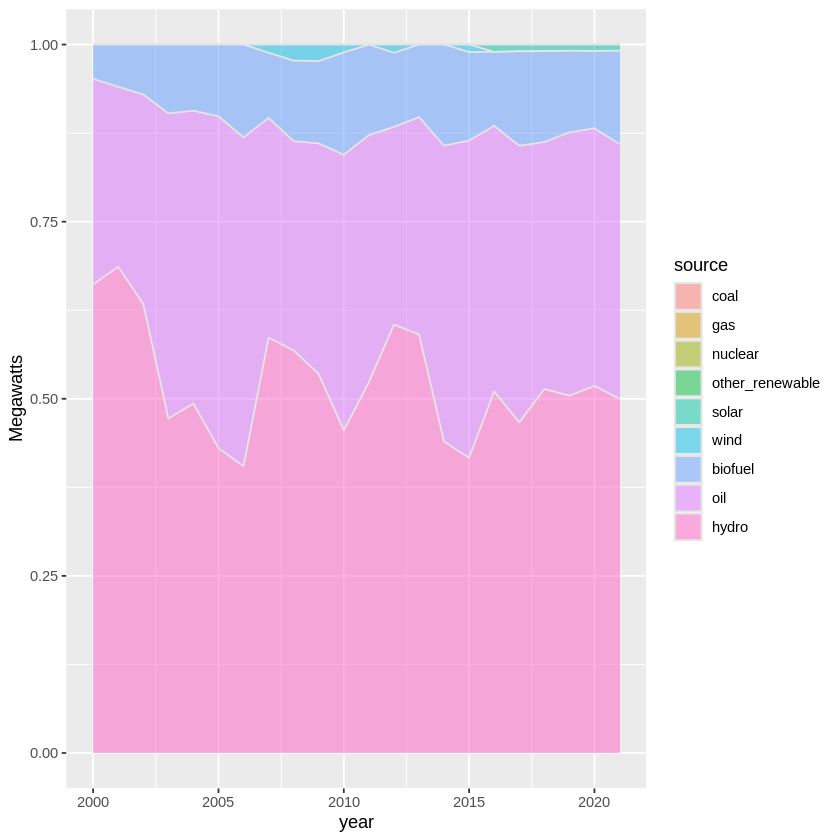

In [43]:
generate_stack_graph <- function(...){
energy %>%
  filter(..., year>1999) %>%
  pivot_longer(
    cols = c(biofuel, coal, gas, hydro, nuclear, oil, other_renewable, solar, wind),
    names_to = "source",
    values_to = "Megawatts"
  ) %>% mutate(source = fct_reorder(source, Megawatts)) %>%
    select (country, year, source,Megawatts) %>%
    ggplot(aes(x=year,y=Megawatts,fill=source))+
    geom_area(colour="grey90", alpha = 0.5, position = "fill")

}

generate_stack_graph(country == "Fiji")


2. A scatter plot that looks at how CO2 per capita and GDP per capita are related